In [121]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA

from mofgbmlpy.gbml.solution.pittsburgh_scikit_classifier import PittsburghScikitClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_diabetes, load_digits
from mofgbmlpy.fuzzy.knowledge.factory.homo_triangle_knowledge_factory_5 import HomoTriangleKnowledgeFactory_5
from mofgbmlpy.main.nsgaii.mofgbml_nsgaii_main import MoFGBMLNSGAIIMain
from sklearn.preprocessing import normalize, minmax_scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train_rescaled = minmax_scale(X_train)
X_test_rescaled = minmax_scale(X_test)

train = PittsburghScikitClassifier.dataset_from_x_y(X_train_rescaled, y_train)
test = PittsburghScikitClassifier.dataset_from_x_y(X_test_rescaled, y_test)

In [122]:
args = [
    "--algorithm-id", "1",
    "--experiment-id", "2",
    "--data-name", "iris",
    "--train-file", "../dataset/iris/a0_0_iris-10tra.dat",
    "--test-file", "../dataset/iris/a0_0_iris-10tst.dat",
    "--terminate-evaluation", "3000",
    "--objectives", "num-rules", "error-rate",
    # "--crossover-type", "pittsburgh-crossover",
    # "--antecedent-factory", "all-combination-antecedent-factory",
    "--no-output-files",
    "--verbose"
]

runner = MoFGBMLNSGAIIMain(HomoTriangleKnowledgeFactory_5)
results = runner.main(args, train, test)

120
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       60 |      3 |             - |             -
     2 |      120 |      4 |  1.2000000000 |         ideal
     3 |      180 |      8 |  0.0200000000 |             f
     4 |      240 |     15 |  0.0135973854 |             f
     5 |      300 |     14 |  0.6666666667 |         nadir
     6 |      360 |     27 |  0.000000E+00 |             f
     7 |      420 |     43 |  0.000000E+00 |             f
     8 |      480 |     60 |  0.0006666667 |             f
     9 |      540 |     60 |  0.0013333333 |             f
    10 |      600 |     60 |  0.0008888889 |             f
    11 |      660 |     60 |  0.0017777778 |             f
    12 |      720 |     60 |  0.0026666667 |             f
    13 |      780 |     60 |  0.000000E+00 |             f
    14 |      840 |     60 |  0.000000E+00 |             f
    15 |      900 |     60 |  0.000000E+00 |             f
    16 |      960 |     60 |  0.000000E+00 |        

In [123]:
classifiers = []
for sol in results.opt.get('X')[:, 0]:
    classifiers.append(sol.create_scikit_classifier())
    
for cl in classifiers:
    cl = cl.fit(X_train_rescaled, y_train)
    print(cl.score(X_test_rescaled, y_test))

0.9666666666666667
0.3
0.3
0.9
0.6333333333333333
0.6333333333333333
0.8333333333333334
0.8333333333333334
0.3
0.3
0.3
0.3
0.3
0.6333333333333333
0.3
0.3
0.3
0.3
0.3
0.6333333333333333
0.3
0.8333333333333334
0.3
0.3
0.3
0.6333333333333333
0.3
0.3
0.3
0.8333333333333334
0.3
0.6333333333333333
0.3
0.6333333333333333
0.3
0.3
0.6333333333333333
0.3
0.3
0.3
0.3
0.3
0.3
0.8333333333333334
0.8333333333333334
0.6333333333333333
0.3
0.6333333333333333
0.3
0.9
0.3
0.9666666666666667
0.3
0.6333333333333333
0.6333333333333333
0.6333333333333333
0.3
0.6333333333333333
0.3
0.3


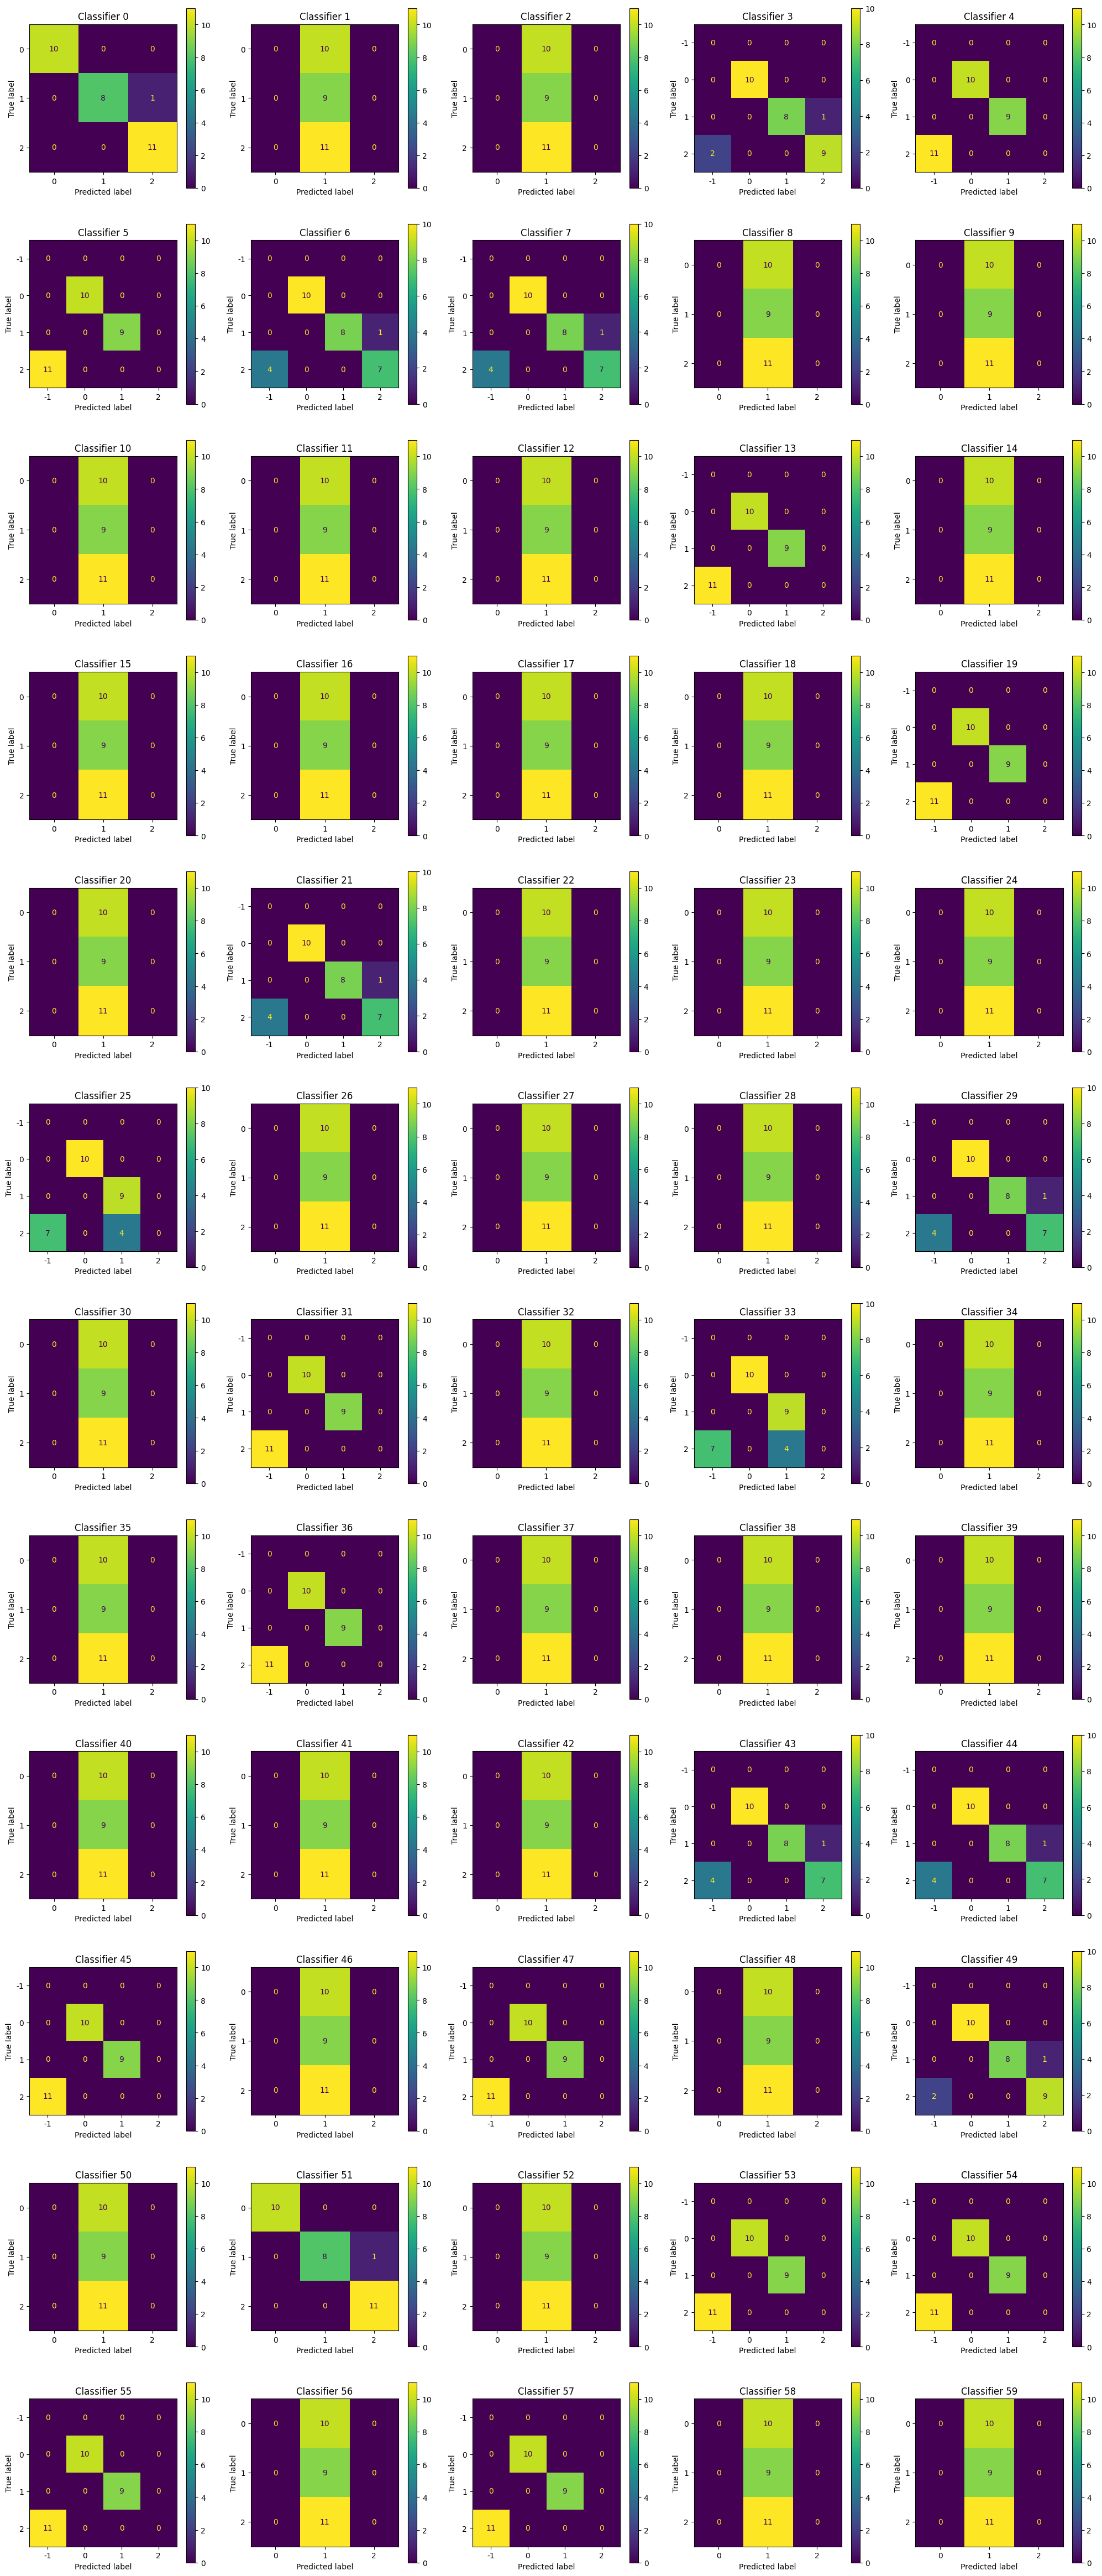

In [124]:
n_rows = (len(classifiers)//5) + 0 if len(classifiers) % 5 == 0 else 1
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
axes = axes.flatten()
i = 0
for ax, cl in zip(axes, classifiers):
    y_pred = cl.predict(X_test_rescaled)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(cl, X_test_rescaled, y_test, ax=ax)    
    ax.set_title(f"Classifier {i}")
    i += 1

plt.show()

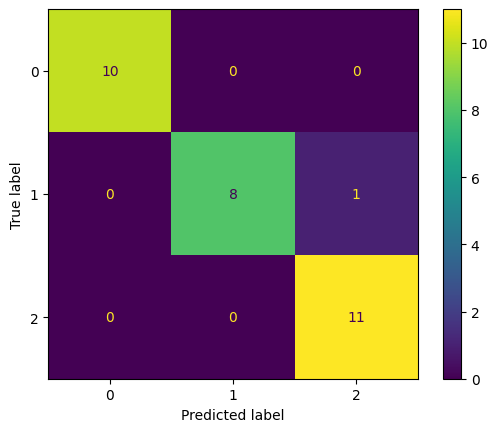

In [125]:
cl = classifiers[0]

ConfusionMatrixDisplay.from_estimator(cl, X_test_rescaled, y_test)
plt.show()

## Experiment with PCA dimension reduction and decision boundaries plot

In [126]:
args = [
    "--algorithm-id", "1",
    "--experiment-id", "2",
    "--data-name", "iris",
    "--train-file", "../dataset/iris/a0_0_iris-10tra.dat",
    "--test-file", "../dataset/iris/a0_0_iris-10tst.dat",
    "--terminate-evaluation", "3000",
    "--objectives", "total-rule-length", "error-rate",
    # "--crossover-type", "pittsburgh-crossover",
    # "--antecedent-factory", "all-combination-antecedent-factory",
    "--no-output-files",
    "--verbose"
]

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

X_train_reduced_rescaled = minmax_scale(X_train_reduced)
X_test_reduced_rescaled = minmax_scale(X_test_reduced)

train_reduced_reduced = PittsburghScikitClassifier.dataset_from_x_y(X_train_reduced_rescaled, y_train)
test_reduced_reduced = PittsburghScikitClassifier.dataset_from_x_y(X_test_reduced_rescaled, y_test)

runner = MoFGBMLNSGAIIMain(HomoTriangleKnowledgeFactory_5)
results = runner.main(args, train_reduced_reduced, test_reduced_reduced)

120
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       60 |     12 |             - |             -
     2 |      120 |      6 |  0.7500000000 |         ideal
     3 |      180 |     11 |  0.0138888889 |         ideal
     4 |      240 |     27 |  0.000000E+00 |             f
     5 |      300 |     45 |  0.000000E+00 |             f
     6 |      360 |     60 |  0.000000E+00 |             f
     7 |      420 |     60 |  0.2857142857 |         nadir
     8 |      480 |     60 |  0.000000E+00 |             f
     9 |      540 |     60 |  0.000000E+00 |             f
    10 |      600 |     60 |  0.000000E+00 |             f
    11 |      660 |     60 |  0.000000E+00 |             f
    12 |      720 |     60 |  0.000000E+00 |             f
    13 |      780 |     60 |  0.000000E+00 |             f
    14 |      840 |     60 |  0.000000E+00 |             f
    15 |      900 |     60 |  0.000000E+00 |             f
    16 |      960 |     60 |  0.000000E+00 |        

In [127]:
classifiers = []
for sol in results.opt.get('X')[:, 0]:
    classifiers.append(sol.create_scikit_classifier())
    
for cl in classifiers:
    cl = cl.fit(X_train_reduced_rescaled, y_train)
    print(cl.score(X_test_reduced_rescaled, y_test))

0.9333333333333333
0.3
0.9333333333333333
0.3
0.6333333333333333
0.6333333333333333
0.9666666666666667
0.9
0.9666666666666667
0.9666666666666667
0.9
0.9666666666666667
0.3
0.9666666666666667
0.9666666666666667
0.3
0.3
0.3
0.3
0.9666666666666667
0.6333333333333333
0.3
0.9666666666666667
0.3
0.9666666666666667
0.9666666666666667
0.3
0.9666666666666667
0.6333333333333333
0.9
0.9666666666666667
0.6333333333333333
0.9666666666666667
0.9
0.6333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.3
0.3
0.9666666666666667
0.3
0.6333333333333333
0.3
0.6333333333333333
0.3
0.9
0.6333333333333333
0.9666666666666667
0.9
0.9
0.9
0.9
0.3
0.6333333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.3


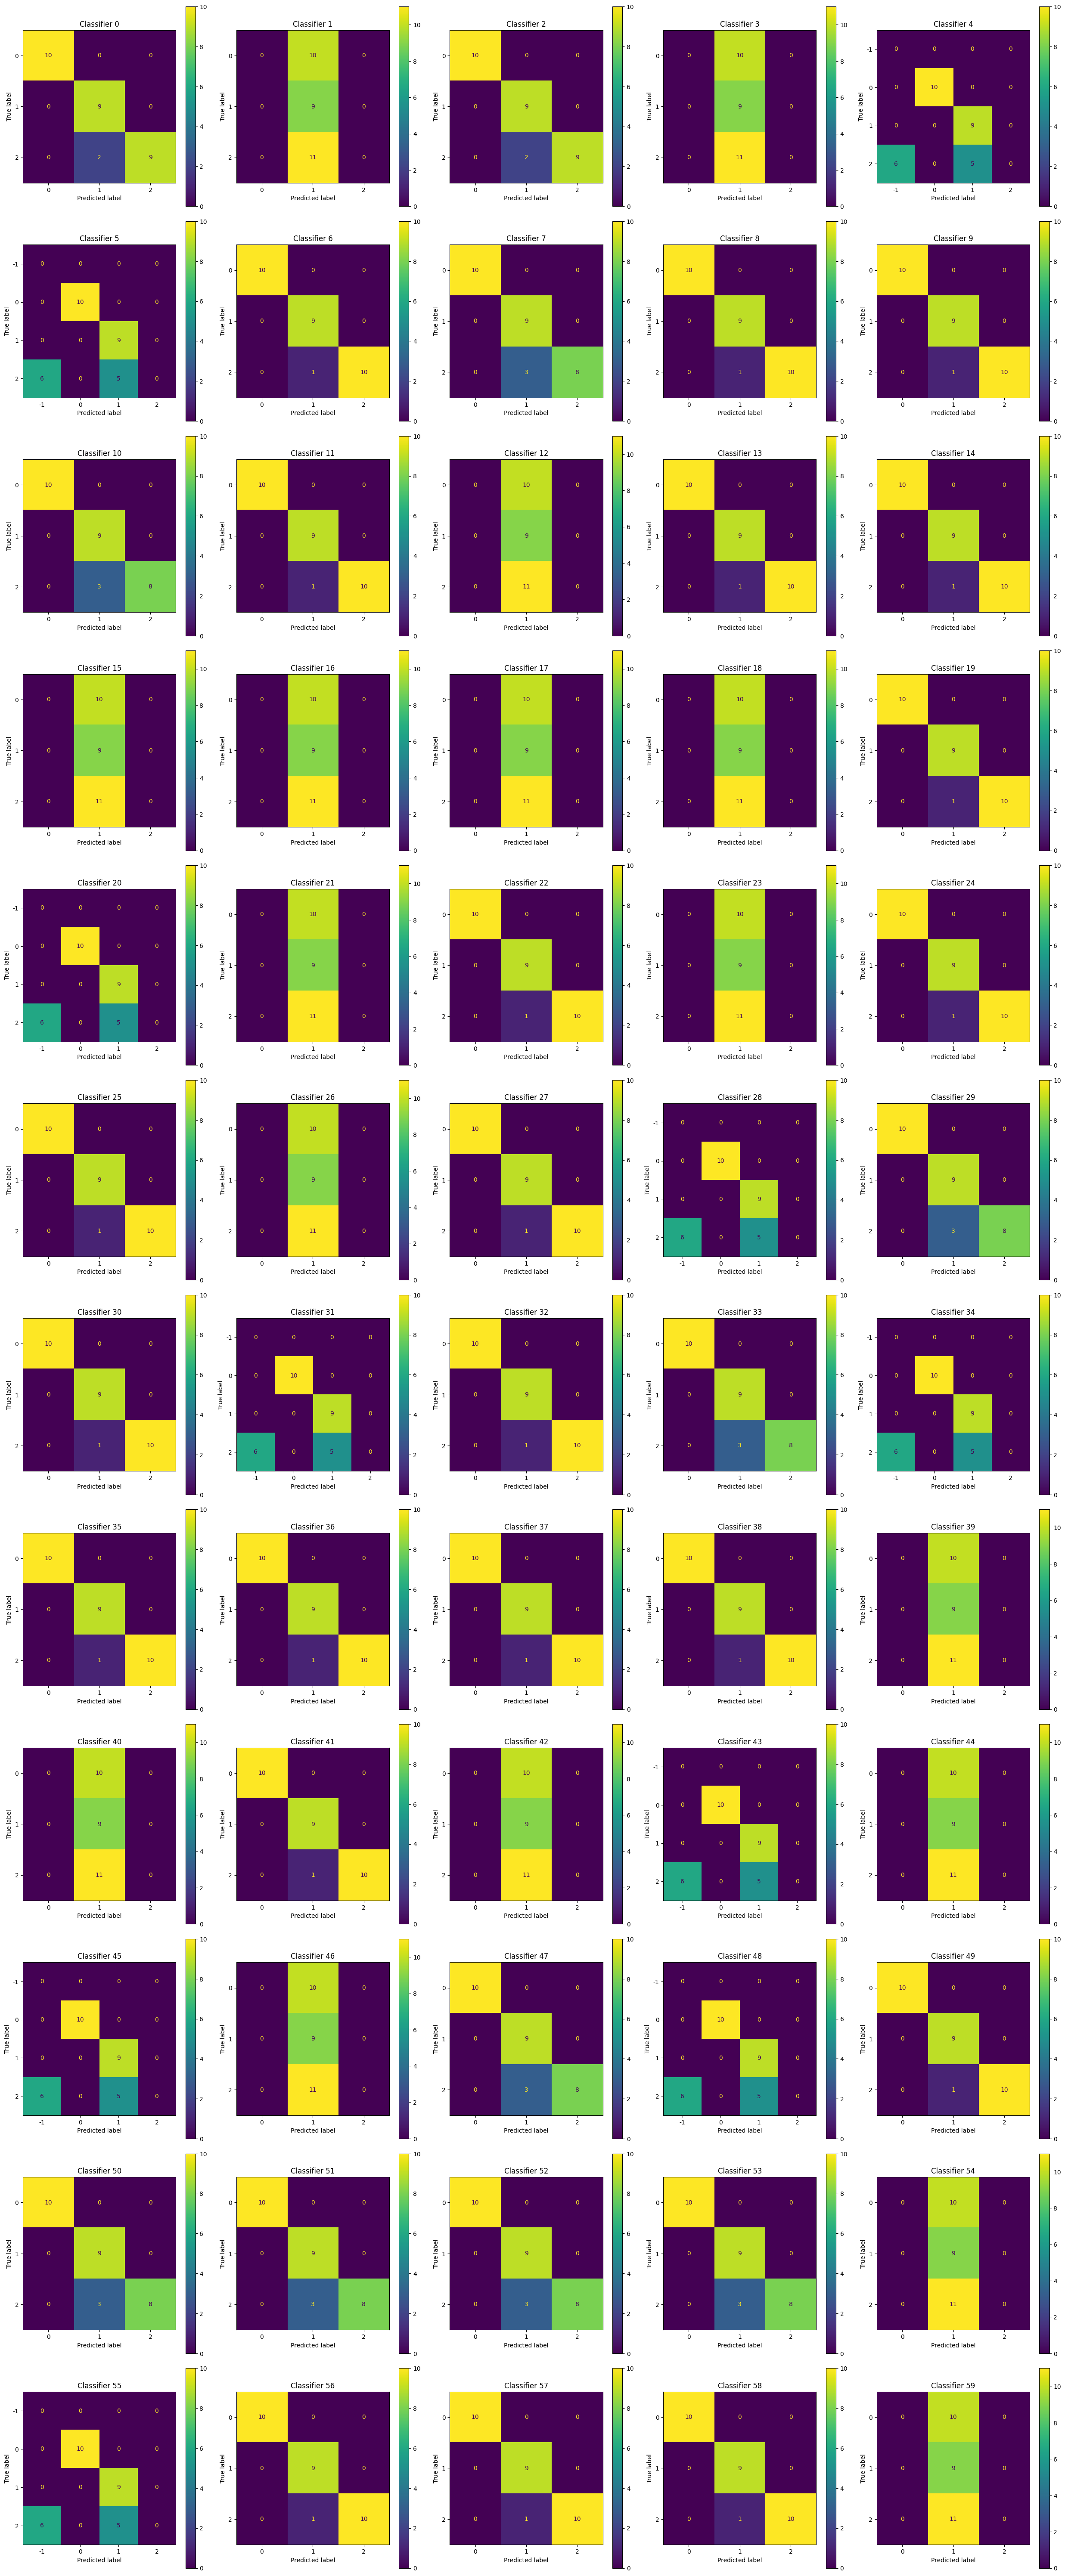

In [128]:
n_rows = (len(classifiers)//5) + 0 if len(classifiers) % 5 == 0 else 1
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
axes = axes.flatten()
i = 0
for ax, cl in zip(axes, classifiers):
    y_pred = cl.predict(X_test_reduced_rescaled)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_estimator(cl, X_test_reduced_rescaled, y_test, ax=ax)    
    ax.set_title(f"Classifier {i}")
    i += 1

plt.tight_layout()
plt.show()

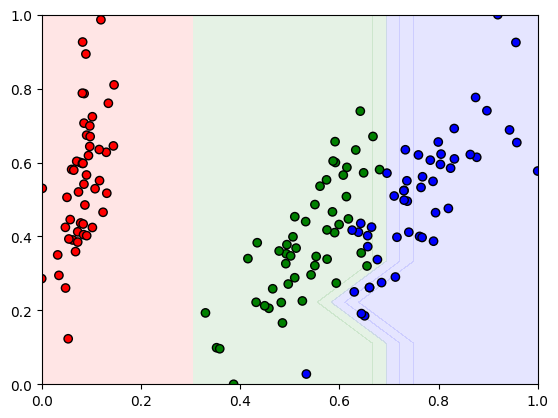

In [130]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
X_reduced_rescaled = minmax_scale(pca.transform(X))

cl = classifiers[0]

cmap = ListedColormap(['red', 'green', 'blue']) 

num_points_per_dim = 10

feature_1, feature_2 = np.meshgrid(
    np.linspace(0, 1, num=num_points_per_dim),
    np.linspace(0, 1, num=num_points_per_dim)
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
predictions = cl.predict(grid)
predictions = predictions.reshape(feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=predictions
)
fig, ax = plt.subplots()
display.plot(ax=ax, cmap=cmap, alpha=0.1)
display.ax_.scatter(
    X_reduced_rescaled[:, 0], X_reduced_rescaled[:, 1], c=data.target, edgecolor="black", cmap=cmap
)
plt.show()